<a href="https://colab.research.google.com/github/hieultse150560/GAN-project/blob/main/DeepSpeech2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 8.0 MB/s 
     |████████████████████████████████| 1.1 MB 53.9 MB/s 
     |████████████████████████████████| 140 kB 66.8 MB/s 
     |████████████████████████████████| 212 kB 71.2 MB/s 
     |████████████████████████████████| 101 kB 13.5 MB/s 
     |████████████████████████████████| 596 kB 67.7 MB/s 
     |████████████████████████████████| 127 kB 69.8 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
     |████████████████████████████████| 271 kB 55.2 MB/s 
     |████████████████████████████████| 144 kB 52.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dep

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path_to_zip_file = "/content/drive/MyDrive/WorkingData/Totonro.zip"
# import zipfile
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/WorkingData/DeepSpeech2/")

In [ ]:
# path_to_zip_file = "/content/drive/MyDrive/WorkingData/RAVDESS.zip"
# import zipfile
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall("/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/")

In [3]:
from datasets import load_from_disk
dataset = load_from_disk("/content/drive/MyDrive/WorkingData/DeepSpeech2/FileSplit/RAV_TESS_preprocessed_data")
train_dataset, val_dataset = dataset["train"], dataset["validation"]

In [4]:
print(train_dataset)
print(val_dataset)

Dataset({
    features: ['Path', 'Emotion', 'input_values', 'labels'],
    num_rows: 4544
})
Dataset({
    features: ['Path', 'Emotion', 'input_values', 'labels'],
    num_rows: 1136
})


In [5]:
df_train = train_dataset.to_pandas()
df_val = val_dataset.to_pandas()
df_train = df_train.drop(columns=['input_values', 'labels'])
df_val = df_val.drop(columns=['input_values', 'labels'])

In [6]:
df_train.head()

,Path,Emotion
0,RAVDESS/audio_speech_actors_01-24/Actor_19/03-...,happy
1,RAVDESS/audio_speech_actors_01-24/Actor_19/03-...,sad
2,TESS Toronto emotional speech set data/YAF_hap...,happy
3,RAVDESS/Actor_15/03-01-04-02-01-01-15.wav,sad
4,TESS Toronto emotional speech set data/YAF_neu...,neutral


In [7]:
df_val.head()

,Path,Emotion
0,TESS Toronto emotional speech set data/OAF_ang...,angry
1,TESS Toronto emotional speech set data/OAF_ang...,angry
2,TESS Toronto emotional speech set data/YAF_neu...,neutral
3,RAVDESS/audio_speech_actors_01-24/Actor_10/03-...,sad
4,TESS Toronto emotional speech set data/YAF_neu...,neutral


In [8]:
df_train["Emotion"].value_counts()

angry        628
happy        627
sad          627
fearful      627
surprised    627
disgusted    627
neutral      474
calm         307
Name: Emotion, dtype: int64

In [9]:
dir_path = "/content/drive/MyDrive/WorkingData/DeepSpeech2/"
df_train["Path"] = [(dir_path + x) for x in df_train["Path"].values.tolist()]

In [10]:
df_train.head()

,Path,Emotion
0,/content/drive/MyDrive/WorkingData/DeepSpeech2...,happy
1,/content/drive/MyDrive/WorkingData/DeepSpeech2...,sad
2,/content/drive/MyDrive/WorkingData/DeepSpeech2...,happy
3,/content/drive/MyDrive/WorkingData/DeepSpeech2...,sad
4,/content/drive/MyDrive/WorkingData/DeepSpeech2...,neutral


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Emotion'] = le.fit_transform(df_train['Emotion'])
print(le.inverse_transform([0,1,2,3,4,5,6,7]))

['angry' 'calm' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']


In [12]:
df_train.head()

,Path,Emotion
0,/content/drive/MyDrive/WorkingData/DeepSpeech2...,4
1,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6
2,/content/drive/MyDrive/WorkingData/DeepSpeech2...,4
3,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6
4,/content/drive/MyDrive/WorkingData/DeepSpeech2...,5


In [13]:

df_train["Path"].values.tolist()

['/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/audio_speech_actors_01-24/Actor_19/03-01-03-01-01-02-19.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/audio_speech_actors_01-24/Actor_19/03-01-04-02-02-02-19.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/TESS Toronto emotional speech set data/YAF_happy/YAF_pass_happy.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/Actor_15/03-01-04-02-01-01-15.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/TESS Toronto emotional speech set data/YAF_neutral/YAF_sheep_neutral.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/TESS Toronto emotional speech set data/OAF_happy/OAF_good_happy.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/Actor_14/03-01-03-01-01-01-14.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/Actor_06/03-01-04-02-02-01-06.wav',
 '/content/drive/MyDrive/WorkingData/DeepSpeech2/RAVDESS/Actor_21/03-01-06-02-01-01-21.wav',
 '/content/drive/MyDrive/Wor

In [14]:
df_val["Path"] = [(dir_path + x) for x in df_val["Path"].values.tolist()]

In [15]:
df_val.head()

,Path,Emotion
0,/content/drive/MyDrive/WorkingData/DeepSpeech2...,angry
1,/content/drive/MyDrive/WorkingData/DeepSpeech2...,angry
2,/content/drive/MyDrive/WorkingData/DeepSpeech2...,neutral
3,/content/drive/MyDrive/WorkingData/DeepSpeech2...,sad
4,/content/drive/MyDrive/WorkingData/DeepSpeech2...,neutral


In [16]:
df_val['Emotion'] = le.transform(df_val['Emotion'])

In [17]:
df_val.head(20)

,Path,Emotion
0,/content/drive/MyDrive/WorkingData/DeepSpeech2...,0
1,/content/drive/MyDrive/WorkingData/DeepSpeech2...,0
2,/content/drive/MyDrive/WorkingData/DeepSpeech2...,5
3,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6
4,/content/drive/MyDrive/WorkingData/DeepSpeech2...,5
5,/content/drive/MyDrive/WorkingData/DeepSpeech2...,5
6,/content/drive/MyDrive/WorkingData/DeepSpeech2...,7
7,/content/drive/MyDrive/WorkingData/DeepSpeech2...,7
8,/content/drive/MyDrive/WorkingData/DeepSpeech2...,7
9,/content/drive/MyDrive/WorkingData/DeepSpeech2...,5


# Mục mới

In [18]:
%%capture 
!pip install pydub
!pip install noisereduce

In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

# Load dataset

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

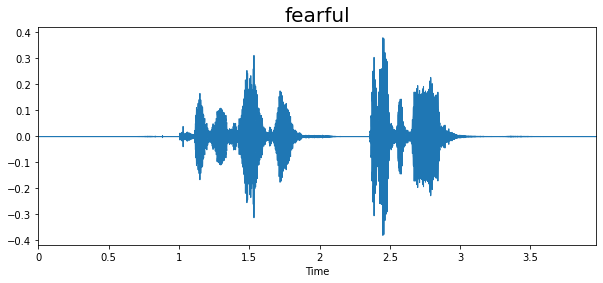

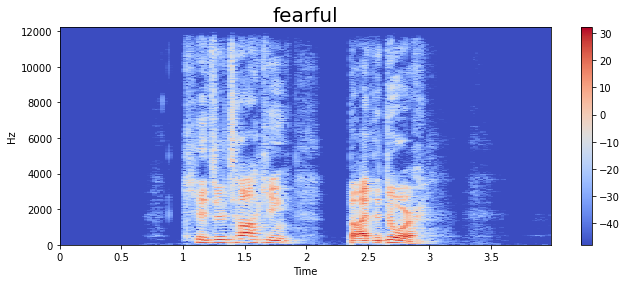

In [ ]:
emotion = 'fearful'
emotionIndex = le.transform([emotion])[0]
path = np.array(df_train['Path'][df_train['Emotion']==emotionIndex])[0]
data, sampling_rate = librosa.load(path, sr = 24414)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
sampling_rate

24414

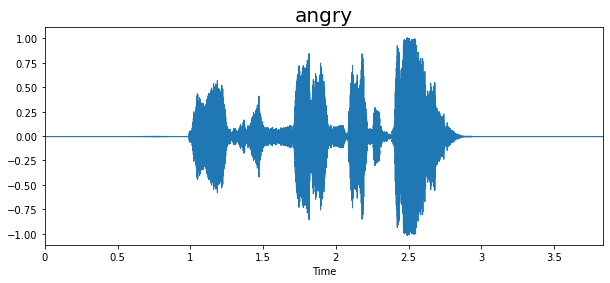

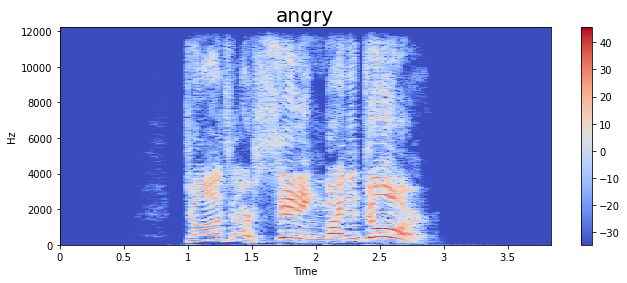

In [ ]:
emotion = 'angry'
emotionIndex = le.transform([emotion])[0]
path = np.array(df_train['Path'][df_train['Emotion']==emotionIndex])[0]
data, sampling_rate = librosa.load(path, sr = 24414)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
sampling_rate

24414

# Feature extraction

In [20]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80

tf.config.run_functions_eagerly(True)

def encode_single_sample(wav_file):  
    """
    Describes the transformation that we apply to each element of our dataset
    """
    ###########################################
    #  Process the Audio
    #########################################
    # 1. Read wav file
    # tf.print(wav_file , label)
    wav_file = wav_file.numpy().decode('utf-8')
    # file = tf.io.read_file(wav_file)
    # audio, sampling_rate = tf.audio.decode_wav(file)
    audio, sampling_rate = librosa.load(wav_file, sr = 24414)

    # audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    stfts = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(stfts) # get absolute value of complex number
    spectrogram = tf.math.pow(spectrogram, 0.5) # get rms
    # 6. mel spectrogram
    num_spectrogram_bins = stfts.shape[-1]
    # Weight for matrix multiplication
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
      num_mel_bins, num_spectrogram_bins, sampling_rate, lower_edge_hertz,
      upper_edge_hertz)
    mel_spectrograms = tf.tensordot(
      spectrogram, linear_to_mel_weight_matrix, 1)
    # The main use case for tf.set_shape is to provide additional shape information that cannot be inferred from the graph alone.
    mel_spectrograms.set_shape(spectrogram.shape[:-1].concatenate(
      linear_to_mel_weight_matrix.shape[-1:]))
    # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
    log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

    # 7. normalisation
    means = tf.math.reduce_mean(log_mel_spectrograms, 1, keepdims=True)
    stddevs = tf.math.reduce_std(log_mel_spectrograms, 1, keepdims=True)
    log_mel_spectrograms = (log_mel_spectrograms - means) / (stddevs + 1e-10)

    return log_mel_spectrograms

In [21]:
df_train.head(10)

,Path,Emotion
0,/content/drive/MyDrive/WorkingData/DeepSpeech2...,4
1,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6
2,/content/drive/MyDrive/WorkingData/DeepSpeech2...,4
3,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6
4,/content/drive/MyDrive/WorkingData/DeepSpeech2...,5
5,/content/drive/MyDrive/WorkingData/DeepSpeech2...,4
6,/content/drive/MyDrive/WorkingData/DeepSpeech2...,4
7,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6
8,/content/drive/MyDrive/WorkingData/DeepSpeech2...,3
9,/content/drive/MyDrive/WorkingData/DeepSpeech2...,6


In [22]:
batch_size = 8
BUFFER_SIZE = 50


train_dataset1 = tf.data.Dataset.from_tensor_slices(
    list(df_train["Path"])
)


train_dataset1 = (
     train_dataset1.map(lambda x: tf.py_function(encode_single_sample, [x], tf.float32))
)


train_dataset2 = tf.data.Dataset.from_tensor_slices(
    list(df_train["Emotion"])
)

train_dataset2 = train_dataset2.map(lambda x: tf.cast(x,tf.float32))

shapes = (tf.TensorShape([None, 80]),tf.TensorShape([]))
train_dataset = tf.data.Dataset.zip((train_dataset1, train_dataset2))


train_dataset = (
     train_dataset.padded_batch(batch_size, padded_shapes = shapes)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


val_dataset1 = tf.data.Dataset.from_tensor_slices(
    list(df_val["Path"])
)


val_dataset1 = (
     val_dataset1.map(lambda x: tf.py_function(encode_single_sample, [x], tf.float32)))


val_dataset2 = tf.data.Dataset.from_tensor_slices(
    list(df_val["Emotion"])
)


val_dataset2 = val_dataset2.map(lambda x: tf.cast(x,tf.float32))

shapes = (tf.TensorShape([None, 80]),tf.TensorShape([]))
val_dataset = tf.data.Dataset.zip((val_dataset1, val_dataset2))

val_dataset = (
     val_dataset.padded_batch(batch_size, padded_shapes = shapes)
    .prefetch(buffer_size=tf.data.AUTOTUNE))

for image, label in train_dataset.take(1):
  print(image.shape, label)
for image2,label2 in val_dataset.take(1):
  print(image2.shape, label2.shape, label2)

(8, 702, 80) tf.Tensor([4. 6. 4. 6. 5. 4. 4. 6.], shape=(8,), dtype=float32)
(8, 559, 80) (8,) tf.Tensor([0. 0. 5. 6. 5. 5. 7. 7.], shape=(8,), dtype=float32)


# Model


In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
        )
        x = layers.Bidirectional(
            recurrent, merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(512)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(256)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_3 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape_4 (Reshape)                             (None, None, 80, 1)                         0                
                                                                                                              
 conv2d_4 (Conv2D)                               (None, None, 40, 32)                        14432            
                                                                                                              
 batch_normalization_4 (BatchNormalization)      (None, None, 40, 32)                     

In [ ]:
EPOCHS = 30
model_history = model.fit(train_dataset, epochs=EPOCHS, batch_size = 1
                          # validation_data=validation_dataset,
                          )


Epoch 1/30


ValueError: ignored

In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(512)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(256)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_2 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape_2 (Reshape)                             (None, None, 80, 1)                         0                
                                                                                                              
 conv2d_2 (Conv2D)                               (None, None, 40, 32)                        14432            
                                                                                                              
 batch_normalization_2 (BatchNormalization)      (None, None, 40, 32)                     

In [ ]:
EPOCHS = 30
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=validation_dataset,
                          )


Epoch 1/30
263/263 [==============================] - 207s 685ms/step - loss: 1.8757 - sparse_categorical_accuracy: 0.2297 - val_loss: 1.8007 - val_sparse_categorical_accuracy: 0.2529
Epoch 2/30
263/263 [==============================] - 164s 622ms/step - loss: 1.7180 - sparse_categorical_accuracy: 0.2879 - val_loss: 1.6194 - val_sparse_categorical_accuracy: 0.4071
Epoch 3/30
263/263 [==============================] - 161s 611ms/step - loss: 1.2156 - sparse_categorical_accuracy: 0.4967 - val_loss: 1.0118 - val_sparse_categorical_accuracy: 0.5486
Epoch 4/30
263/263 [==============================] - 159s 606ms/step - loss: 0.4445 - sparse_categorical_accuracy: 0.8360 - val_loss: 0.6245 - val_sparse_categorical_accuracy: 0.7443
Epoch 5/30
263/263 [==============================] - 159s 605ms/step - loss: 0.1951 - sparse_categorical_accuracy: 0.9342 - val_loss: 0.0597 - val_sparse_categorical_accuracy: 0.9800
Epoch 6/30
263/263 [==============================] - 160s 608ms/step - loss: 0.

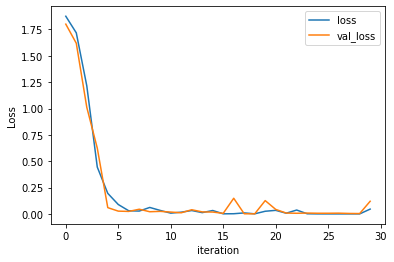

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

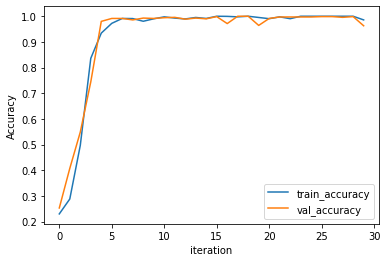

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(512)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(256)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=256
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_4 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape_6 (Reshape)                             (None, None, 80, 1)                         0                
                                                                                                              
 conv2d_6 (Conv2D)                               (None, None, 40, 32)                        14432            
                                                                                                              
 batch_normalization_6 (BatchNormalization)      (None, None, 40, 32)                     

In [ ]:
EPOCHS = 30
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=validation_dataset,
                          )


Epoch 1/30
263/263 [==============================] - 166s 618ms/step - loss: 1.8766 - sparse_categorical_accuracy: 0.2202 - val_loss: 1.8037 - val_sparse_categorical_accuracy: 0.2029
Epoch 2/30
263/263 [==============================] - 160s 608ms/step - loss: 1.7578 - sparse_categorical_accuracy: 0.2622 - val_loss: 1.6875 - val_sparse_categorical_accuracy: 0.3243
Epoch 3/30
263/263 [==============================] - 161s 614ms/step - loss: 1.5698 - sparse_categorical_accuracy: 0.3603 - val_loss: 1.5289 - val_sparse_categorical_accuracy: 0.3814
Epoch 4/30
263/263 [==============================] - 162s 615ms/step - loss: 0.9957 - sparse_categorical_accuracy: 0.5844 - val_loss: 0.5811 - val_sparse_categorical_accuracy: 0.8043
Epoch 5/30
263/263 [==============================] - 161s 613ms/step - loss: 0.4719 - sparse_categorical_accuracy: 0.8313 - val_loss: 0.2839 - val_sparse_categorical_accuracy: 0.8957
Epoch 6/30
263/263 [==============================] - 163s 620ms/step - loss: 0.

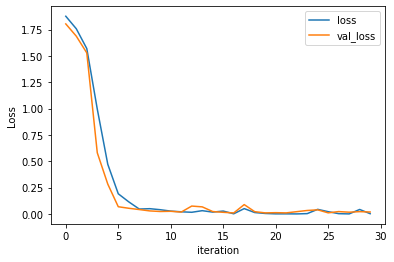

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

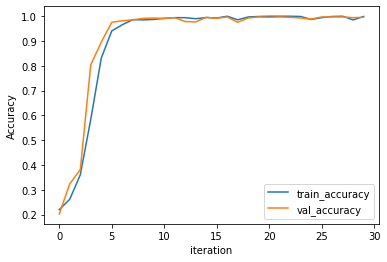

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(256)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(128)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=128
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_7 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape_12 (Reshape)                            (None, None, 80, 1)                         0                
                                                                                                              
 conv2d_12 (Conv2D)                              (None, None, 40, 32)                        14432            
                                                                                                              
 batch_normalization_12 (BatchNormalization)     (None, None, 40, 32)                     

In [ ]:
EPOCHS = 30
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=validation_dataset,
                          )


Epoch 1/30
263/263 [==============================] - 175s 644ms/step - loss: 1.9039 - sparse_categorical_accuracy: 0.2092 - val_loss: 1.7992 - val_sparse_categorical_accuracy: 0.2300
Epoch 2/30
263/263 [==============================] - 166s 631ms/step - loss: 1.8075 - sparse_categorical_accuracy: 0.2493 - val_loss: 1.7649 - val_sparse_categorical_accuracy: 0.2471
Epoch 3/30
263/263 [==============================] - 161s 612ms/step - loss: 1.7490 - sparse_categorical_accuracy: 0.2703 - val_loss: 1.6952 - val_sparse_categorical_accuracy: 0.3629
Epoch 4/30
263/263 [==============================] - 160s 607ms/step - loss: 1.5858 - sparse_categorical_accuracy: 0.3546 - val_loss: 1.3134 - val_sparse_categorical_accuracy: 0.4986
Epoch 5/30
263/263 [==============================] - 167s 635ms/step - loss: 1.1638 - sparse_categorical_accuracy: 0.5119 - val_loss: 0.7309 - val_sparse_categorical_accuracy: 0.7757
Epoch 6/30
263/263 [==============================] - 169s 643ms/step - loss: 0.

In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(128)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(64)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=64
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_4 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape_6 (Reshape)                             (None, None, 80, 1)                         0                
                                                                                                              
 conv2d_6 (Conv2D)                               (None, None, 40, 32)                        14432            
                                                                                                              
 batch_normalization_6 (BatchNormalization)      (None, None, 40, 32)                     

In [ ]:
EPOCHS = 30
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=validation_dataset,
                          )


Epoch 1/30
263/263 [==============================] - 184s 635ms/step - loss: 1.9656 - sparse_categorical_accuracy: 0.1973 - val_loss: 1.8215 - val_sparse_categorical_accuracy: 0.2357
Epoch 2/30
263/263 [==============================] - 157s 596ms/step - loss: 1.8522 - sparse_categorical_accuracy: 0.2150 - val_loss: 1.7608 - val_sparse_categorical_accuracy: 0.2557
Epoch 3/30
263/263 [==============================] - 156s 594ms/step - loss: 1.8259 - sparse_categorical_accuracy: 0.2221 - val_loss: 1.7286 - val_sparse_categorical_accuracy: 0.2943
Epoch 4/30
263/263 [==============================] - 156s 592ms/step - loss: 1.7274 - sparse_categorical_accuracy: 0.2745 - val_loss: 1.6094 - val_sparse_categorical_accuracy: 0.3943
Epoch 5/30
263/263 [==============================] - 156s 593ms/step - loss: 1.6131 - sparse_categorical_accuracy: 0.3398 - val_loss: 1.4181 - val_sparse_categorical_accuracy: 0.4529
Epoch 6/30
263/263 [==============================] - 156s 592ms/step - loss: 1.

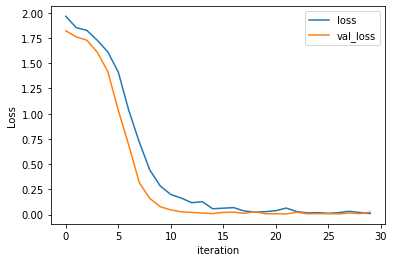

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

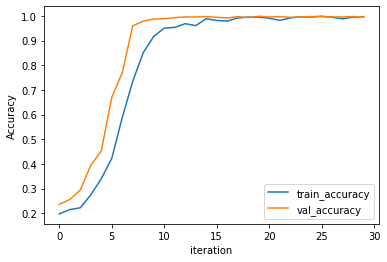

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[5, 35],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[5, 15],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(128)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(64)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=64
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_5 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape_8 (Reshape)                             (None, None, 80, 1)                         0                
                                                                                                              
 conv2d_8 (Conv2D)                               (None, None, 40, 32)                        5600             
                                                                                                              
 batch_normalization_8 (BatchNormalization)      (None, None, 40, 32)                     

In [ ]:
EPOCHS = 20

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=validation_dataset
                          )


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

# Test-Split


In [ ]:
train_ratio = 0.5
split = int(len(df) * train_ratio)
df_train = df[:split]
df_val = df[split:]

In [ ]:
df_train['label'].value_counts()

0    219
1    209
5    203
6    199
3    192
4    190
2    187
Name: label, dtype: int64

In [ ]:
df_val['label'].value_counts()

2    212
4    210
3    208
6    201
5    197
1    191
0    180
Name: label, dtype: int64

In [ ]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80

def encode_single_sample(wav_file, label):
    """
    Describes the transformation that we apply to each element of our dataset
    """
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wav_file)
    # 2. Decode the wav file
    audio, sampling_rate = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    stfts = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(stfts) # get absolute value of complex number
    spectrogram = tf.math.pow(spectrogram, 0.5) # get rms
    # 6. mel spectrogram
    num_spectrogram_bins = stfts.shape[-1]
    # Weight for matrix multiplication
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
      num_mel_bins, num_spectrogram_bins, sampling_rate, lower_edge_hertz,
      upper_edge_hertz)
    mel_spectrograms = tf.tensordot(
      spectrogram, linear_to_mel_weight_matrix, 1)
    # The main use case for tf.set_shape is to provide additional shape information that cannot be inferred from the graph alone.
    mel_spectrograms.set_shape(spectrogram.shape[:-1].concatenate(
      linear_to_mel_weight_matrix.shape[-1:]))
    # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
    log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

    # 7. normalisation
    means = tf.math.reduce_mean(log_mel_spectrograms, 1, keepdims=True)
    stddevs = tf.math.reduce_std(log_mel_spectrograms, 1, keepdims=True)
    log_mel_spectrograms = (log_mel_spectrograms - means) / (stddevs + 1e-10)

    return log_mel_spectrograms, label

# encode_single_sample('/content/TESS Toronto emotional speech set data/YAF_angry/YAF_dip_angry.wav', 0)

In [ ]:
batch_size = 8
BUFFER_SIZE = 50
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["speech"]), list(df_train["label"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["speech"]), list(df_val["label"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

for image,label in train_dataset.take(2):
  print(image.shape, label.shape, label)

for image,label in validation_dataset.take(2):
  print(image.shape, label.shape, label)

(8, 380, 80) (8,) tf.Tensor([1 0 0 1 4 3 2 5], shape=(8,), dtype=int32)
(8, 313, 80) (8,) tf.Tensor([3 3 3 0 3 4 4 2], shape=(8,), dtype=int32)
(8, 372, 80) (8,) tf.Tensor([1 5 0 4 0 6 6 4], shape=(8,), dtype=int32)
(8, 378, 80) (8,) tf.Tensor([6 0 5 3 5 4 5 2], shape=(8,), dtype=int32)


In [ ]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[5, 35],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[5, 15],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(128)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(64)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=7,
    rnn_units=64
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_1 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape (Reshape)                               (None, None, 80, 1)                         0                
                                                                                                              
 conv2d (Conv2D)                                 (None, None, 40, 32)                        5600             
                                                                                                              
 batch_normalization (BatchNormalization)        (None, None, 40, 32)                     

In [ ]:
EPOCHS = 20
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=validation_dataset,
                          )


Epoch 1/20
175/175 [==============================] - 178s 918ms/step - loss: 2.0322 - sparse_categorical_accuracy: 0.1694 - val_loss: 1.8802 - val_sparse_categorical_accuracy: 0.2152
Epoch 2/20
175/175 [==============================] - 155s 890ms/step - loss: 1.8735 - sparse_categorical_accuracy: 0.2259 - val_loss: 1.8022 - val_sparse_categorical_accuracy: 0.2716
Epoch 3/20
175/175 [==============================] - 155s 891ms/step - loss: 1.8430 - sparse_categorical_accuracy: 0.2316 - val_loss: 1.7593 - val_sparse_categorical_accuracy: 0.3124
Epoch 4/20
175/175 [==============================] - 155s 891ms/step - loss: 1.8026 - sparse_categorical_accuracy: 0.2595 - val_loss: 1.7239 - val_sparse_categorical_accuracy: 0.3181
Epoch 5/20
175/175 [==============================] - 156s 892ms/step - loss: 1.7731 - sparse_categorical_accuracy: 0.2559 - val_loss: 1.7017 - val_sparse_categorical_accuracy: 0.3595
Epoch 6/20
175/175 [==============================] - 155s 887ms/step - loss: 1.

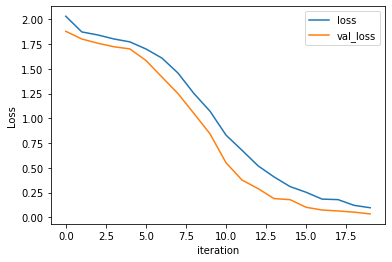

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

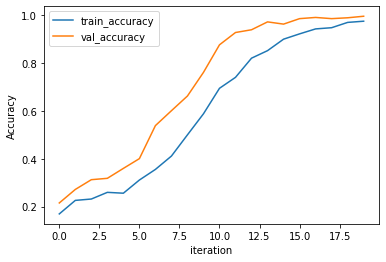

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
train_ratio = 0.25
split = int(len(df) * train_ratio)
df_train = df[:split]
df_val = df[split:]

In [ ]:
df_train['label'].value_counts()

0    113
2    104
1    103
5    102
6    100
3     91
4     86
Name: label, dtype: int64

In [ ]:
df_val['label'].value_counts()

4    314
3    309
6    300
5    298
1    297
2    295
0    286
Name: label, dtype: int64

In [ ]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

lower_edge_hertz, upper_edge_hertz, num_mel_bins = 80.0, 7600.0, 80

def encode_single_sample(wav_file, label):
    """
    Describes the transformation that we apply to each element of our dataset
    """
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wav_file)
    # 2. Decode the wav file
    audio, sampling_rate = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    stfts = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(stfts) # get absolute value of complex number
    spectrogram = tf.math.pow(spectrogram, 0.5) # get rms
    # 6. mel spectrogram
    num_spectrogram_bins = stfts.shape[-1]
    # Weight for matrix multiplication
    linear_to_mel_weight_matrix = tf.signal.linear_to_mel_weight_matrix(
      num_mel_bins, num_spectrogram_bins, sampling_rate, lower_edge_hertz,
      upper_edge_hertz)
    mel_spectrograms = tf.tensordot(
      spectrogram, linear_to_mel_weight_matrix, 1)
    # The main use case for tf.set_shape is to provide additional shape information that cannot be inferred from the graph alone.
    mel_spectrograms.set_shape(spectrogram.shape[:-1].concatenate(
      linear_to_mel_weight_matrix.shape[-1:]))
    # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
    log_mel_spectrograms = tf.math.log(mel_spectrograms + 1e-6)

    # 7. normalisation
    means = tf.math.reduce_mean(log_mel_spectrograms, 1, keepdims=True)
    stddevs = tf.math.reduce_std(log_mel_spectrograms, 1, keepdims=True)
    log_mel_spectrograms = (log_mel_spectrograms - means) / (stddevs + 1e-10)

    return log_mel_spectrograms, label

# encode_single_sample('/content/TESS Toronto emotional speech set data/YAF_angry/YAF_dip_angry.wav', 0)

In [ ]:
batch_size = 8
BUFFER_SIZE = 50
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["speech"]), list(df_train["label"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["speech"]), list(df_val["label"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

for image,label in train_dataset.take(2):
  print(image.dtype, label.shape, label)

for image,label in validation_dataset.take(2):
  print(image.dtype, label.shape, label)

KeyError: ignored

# Mục mới

In [23]:
from tensorflow.keras import layers

def build_model(input_dim, output_dim, rnn_layers=3, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim))
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1))(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[5, 35],
        strides=[2, 2],
        padding="same",
        use_bias=False
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[5, 15],
        strides=[1, 2],
        padding="same",
        use_bias=False,
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    # for i in range(1, rnn_layers):
    #     recurrent = layers.GRU(
    #         units=rnn_units,
    #         activation="tanh",
    #         recurrent_activation="sigmoid",
    #         use_bias=True,
    #         return_sequences=True,
    #         reset_after=True,
    #     )
    #     x = layers.Bidirectional(
    #         recurrent, merge_mode="concat"
    #     )(x)
    #     if i < rnn_layers:
    #         x = layers.Dropout(rate=0.5)(x)
    recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            reset_after=True,
        )
    x = layers.Bidirectional(
            recurrent, merge_mode="concat")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    # x = layers.Dense(units=rnn_units * 2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(128)(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    x = layers.Dense(64)(x)
    output = layers.Dense(units=output_dim, activation="softmax")(x)
    # Model
    model = tf.keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    return model


# Get the model
model = build_model(
    input_dim=80,
    output_dim=8,
    rnn_units=64
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input_1 (InputLayer)                            [(None, None, 80)]                          0                
                                                                                                              
 reshape (Reshape)                               (None, None, 80, 1)                         0                
                                                                                                              
 conv2d (Conv2D)                                 (None, None, 40, 32)                        5600             
                                                                                                              
 batch_normalization (BatchNormalization)        (None, None, 40, 32)                     

In [ ]:
EPOCHS = 10


load_path = '/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS1.weights.04 - 1.87.h5'
model.load_weights(load_path)

checkpoint_filepath = "/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS2.weights.{epoch:02d} - {val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        verbose = 1)

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks = [checkpoint_callback]
                          )


Epoch 1/10
568/568 [==============================] - ETA: 0s - loss: 1.8344 - sparse_categorical_accuracy: 0.2645
Epoch 1: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS2.weights.01 - 1.67.h5
568/568 [==============================] - 1980s 3s/step - loss: 1.8344 - sparse_categorical_accuracy: 0.2645 - val_loss: 1.6746 - val_sparse_categorical_accuracy: 0.3336
Epoch 2/10
568/568 [==============================] - ETA: 0s - loss: 1.7213 - sparse_categorical_accuracy: 0.2938
Epoch 2: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS2.weights.02 - 1.56.h5
568/568 [==============================] - 576s 1s/step - loss: 1.7213 - sparse_categorical_accuracy: 0.2938 - val_loss: 1.5597 - val_sparse_categorical_accuracy: 0.3662
Epoch 3/10
568/568 [==============================] - ETA: 0s - loss: 1.5945 - sparse_categorical_accuracy: 0.3651
Epoch 3: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS2.weights.03 

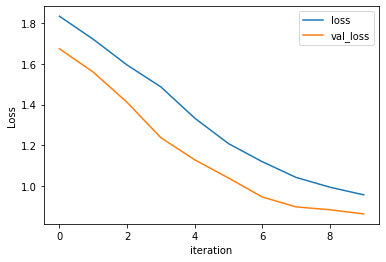

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

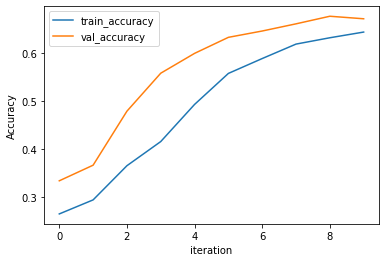

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
EPOCHS = 5

load_path = '/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS2.weights.10 - 0.86.h5'
model.load_weights(load_path)

checkpoint_filepath = "/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS3.weights.{epoch:02d} - {val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        verbose = 1)

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks = [checkpoint_callback]
                          )


Epoch 1/5
568/568 [==============================] - ETA: 0s - loss: 0.9090 - sparse_categorical_accuracy: 0.6596
Epoch 1: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS3.weights.01 - 0.85.h5
568/568 [==============================] - 2081s 4s/step - loss: 0.9090 - sparse_categorical_accuracy: 0.6596 - val_loss: 0.8541 - val_sparse_categorical_accuracy: 0.6752
Epoch 2/5
568/568 [==============================] - ETA: 0s - loss: 0.8528 - sparse_categorical_accuracy: 0.6780
Epoch 2: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS3.weights.02 - 0.82.h5
568/568 [==============================] - 621s 1s/step - loss: 0.8528 - sparse_categorical_accuracy: 0.6780 - val_loss: 0.8213 - val_sparse_categorical_accuracy: 0.6849
Epoch 3/5
568/568 [==============================] - ETA: 0s - loss: 0.8148 - sparse_categorical_accuracy: 0.6952
Epoch 3: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS3.weights.03 - 0

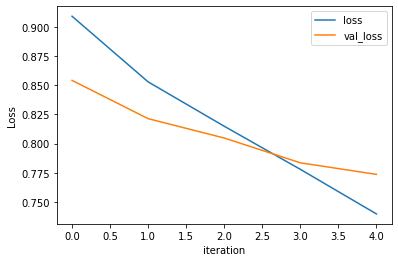

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

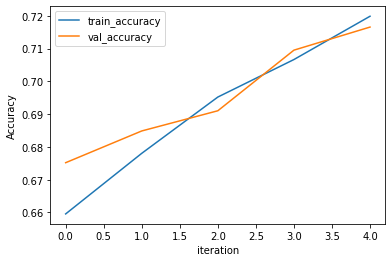

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
EPOCHS = 10

load_path = '/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS3.weights.05 - 0.77.h5'
model.load_weights(load_path)

checkpoint_filepath = "/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS4.weights.{epoch:02d} - {val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        verbose = 1)

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks = [checkpoint_callback]
                          )


Epoch 1/10
568/568 [==============================] - ETA: 0s - loss: 0.7047 - sparse_categorical_accuracy: 0.7375
Epoch 1: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS4.weights.01 - 0.76.h5
568/568 [==============================] - 4237s 7s/step - loss: 0.7047 - sparse_categorical_accuracy: 0.7375 - val_loss: 0.7552 - val_sparse_categorical_accuracy: 0.7201
Epoch 2/10
568/568 [==============================] - ETA: 0s - loss: 0.6540 - sparse_categorical_accuracy: 0.7531
Epoch 2: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS4.weights.02 - 0.75.h5
568/568 [==============================] - 589s 1s/step - loss: 0.6540 - sparse_categorical_accuracy: 0.7531 - val_loss: 0.7528 - val_sparse_categorical_accuracy: 0.7324
Epoch 3/10
568/568 [==============================] - ETA: 0s - loss: 0.6451 - sparse_categorical_accuracy: 0.7628
Epoch 3: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS4.weights.03 

In [ ]:
EPOCHS = 10


load_path = '/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS4.weights.04 - 0.71.h5'
model.load_weights(load_path)

checkpoint_filepath = "/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS5.weights.{epoch:02d} - {val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        verbose = 1)

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks = [checkpoint_callback]
                          )


Epoch 1/10
568/568 [==============================] - ETA: 0s - loss: 0.5562 - sparse_categorical_accuracy: 0.7949
Epoch 1: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS5.weights.01 - 0.71.h5
568/568 [==============================] - 2211s 4s/step - loss: 0.5562 - sparse_categorical_accuracy: 0.7949 - val_loss: 0.7132 - val_sparse_categorical_accuracy: 0.7535
Epoch 2/10
568/568 [==============================] - ETA: 0s - loss: 0.5292 - sparse_categorical_accuracy: 0.7986
Epoch 2: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS5.weights.02 - 0.72.h5
568/568 [==============================] - 605s 1s/step - loss: 0.5292 - sparse_categorical_accuracy: 0.7986 - val_loss: 0.7228 - val_sparse_categorical_accuracy: 0.7641
Epoch 3/10
568/568 [==============================] - ETA: 0s - loss: 0.5104 - sparse_categorical_accuracy: 0.8110
Epoch 3: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS5.weights.03 

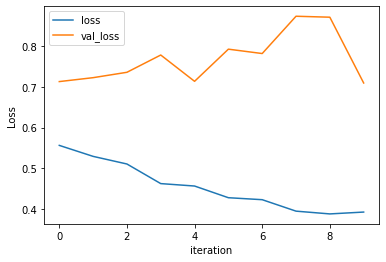

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

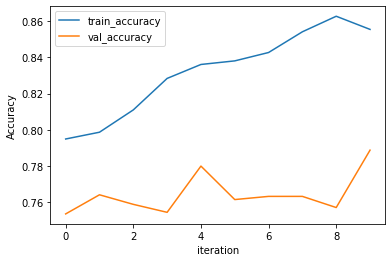

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
EPOCHS = 10


load_path = '/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS5.weights.10 - 0.71.h5'
model.load_weights(load_path)

checkpoint_filepath = "/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS6.weights.{epoch:02d} - {val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        verbose = 1)

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks = [checkpoint_callback]
                          )


Epoch 1/10
568/568 [==============================] - ETA: 0s - loss: 0.3275 - sparse_categorical_accuracy: 0.8809
Epoch 1: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS6.weights.01 - 0.70.h5
568/568 [==============================] - 595s 1s/step - loss: 0.3275 - sparse_categorical_accuracy: 0.8809 - val_loss: 0.6976 - val_sparse_categorical_accuracy: 0.8072
Epoch 2/10
568/568 [==============================] - ETA: 0s - loss: 0.3195 - sparse_categorical_accuracy: 0.8801
Epoch 2: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS6.weights.02 - 0.78.h5
568/568 [==============================] - 591s 1s/step - loss: 0.3195 - sparse_categorical_accuracy: 0.8801 - val_loss: 0.7805 - val_sparse_categorical_accuracy: 0.7949
Epoch 3/10
568/568 [==============================] - ETA: 0s - loss: 0.3342 - sparse_categorical_accuracy: 0.8748
Epoch 3: saving model to /content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS6.weights.03 -

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [26]:
EPOCHS = 10

load_path = '/content/drive/MyDrive/WorkingData/DeepSpeech2/Checkpoint/DS6.weights.05 - 0.84.h5'
model.load_weights(load_path)

checkpoint_filepath = "/content/DS7.weights.{epoch:02d} - {val_loss:.2f}.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        verbose = 1)

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks = [checkpoint_callback]
                          )


Epoch 1/10
568/568 [==============================] - ETA: 0s - loss: 0.2882 - sparse_categorical_accuracy: 0.8955
Epoch 1: saving model to /content/DS7.weights.01 - 0.76.h5
568/568 [==============================] - 619s 1s/step - loss: 0.2882 - sparse_categorical_accuracy: 0.8955 - val_loss: 0.7589 - val_sparse_categorical_accuracy: 0.7870
Epoch 2/10
568/568 [==============================] - ETA: 0s - loss: 0.2948 - sparse_categorical_accuracy: 0.8928
Epoch 2: saving model to /content/DS7.weights.02 - 0.69.h5
568/568 [==============================] - 603s 1s/step - loss: 0.2948 - sparse_categorical_accuracy: 0.8928 - val_loss: 0.6860 - val_sparse_categorical_accuracy: 0.8151
Epoch 3/10
568/568 [==============================] - ETA: 0s - loss: 0.2565 - sparse_categorical_accuracy: 0.9049
Epoch 3: saving model to /content/DS7.weights.03 - 0.72.h5
568/568 [==============================] - 605s 1s/step - loss: 0.2565 - sparse_categorical_accuracy: 0.9049 - val_loss: 0.7214 - val_spar

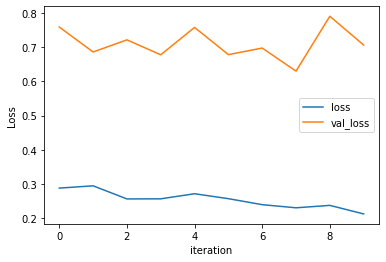

In [27]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

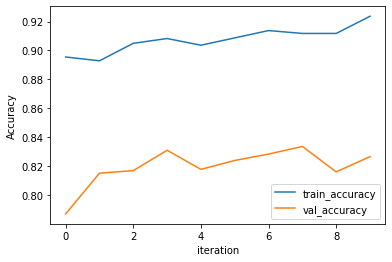

In [28]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

ValueError: ignored

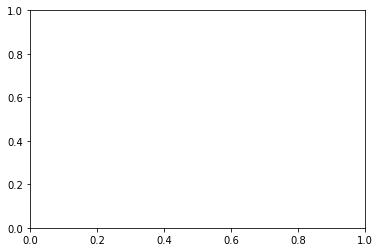

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

ValueError: ignored

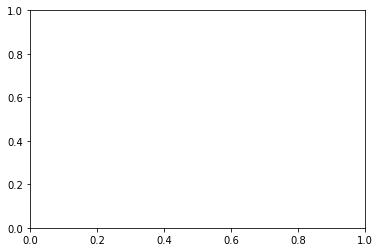

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(model_history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()